#Image Processing Lab 1  
Welcome to the first lab of Image Processing. In order to utilize our colab notebooks we can connect our google drive with colab notebook and that way all the images and data will be saved even after the session. So upload your data within drive/Mydrive and make a directory for your convenience. The following code will mount your google drive to this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Image Processing with Python**
The first thing that we should do is load an image with the Image.open() function from Pillow package; if you check the image 'lena.png' (you should better get used to it cause you are going to use it a lot!), you'll see that it's a 256 x 256 image in grayscale (you can check it out by using the shape attribute within numpy array.) Remember Image.open returns an object of an Image, so if you want to manipulate the Image you need to convert it into a numpy array using np.asarray(Image object).

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import matplotlib.image as mpimg
import numpy as np
path = '/content/drive/MyDrive/2n UNI/3r Trimestre/Processament Imatges/Labs/Lab1/'
lena = np.array(Image.open(path+"lena.png"))


In [ ]:
def show_image(img, title):
  imgplot = plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.show()

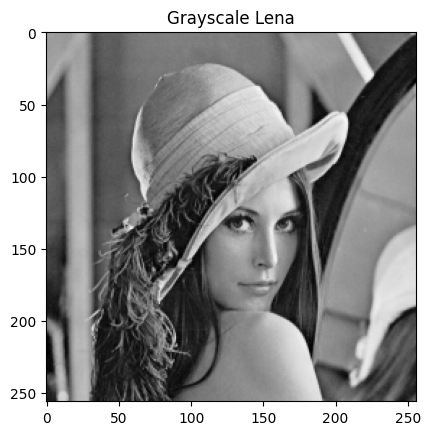

In [ ]:
show_image(lena,"Grayscale Lena")

In [ ]:
lena_old = lena
lena.shape


(256, 256)

Let's check, for instance, the position (10,20) of a, which will indicate the value of the image pixel in the 10th row and 20th column.

In [ ]:
lena[10,20]

164

As you can see, the grayscale value at position (10,20) is 164.
From now on, you'll perform several operations on top of images. As an example, imagine you want to change the value of a particular pixel (row 121, columns 126) to zero.

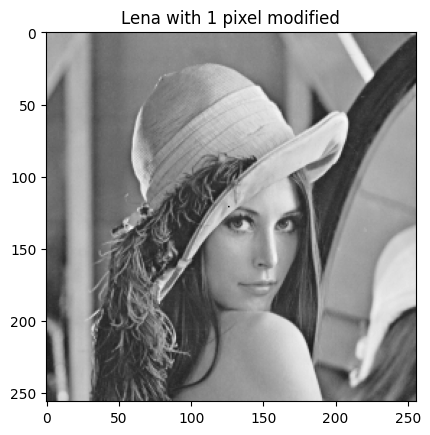

In [ ]:
lena[121,126] = 0
show_image(lena, "Lena with 1 pixel modified")

With this line, you changed one single pixel of this image, and bearing in mind that it contains more than 65000 pixels itself (256*256), you will barely see the difference, right?
In order to produce changes to the image that are visible, you have to change the grayscale value of groups of pixels at the same time. In this simple examples, we'll build a "thug" version of Lena, placing some black sunglasses on top of her face.
We'll start with the top part of the glasses, that will go from rows 126 to rows 133 and columns 121 to 180; it is as simple as indicating these positions with a vector, using " : ".

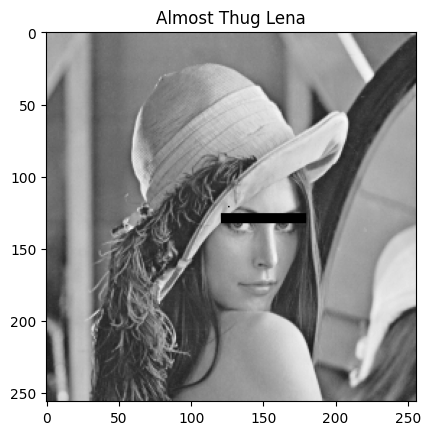

In [ ]:
lena[126:133,121:180] = 0;
show_image(lena,'Almost Thug Lena')

You can see that we drawn a beautiful rectangle in the above-mentioned rows and columns. In order to end it up, we'll add the two last parts of the sunglasses...

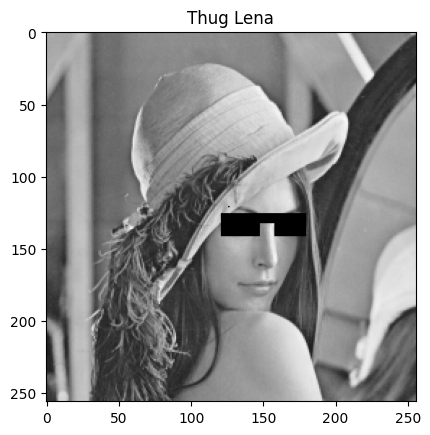

In [ ]:
lena[133:142, 121:148] = 0
lena[133:142, 158:180] = 0
show_image(lena, "Thug Lena")

# Types of Images
As you might have seen before, the image we loaded was stored in a uint8 matrix. Although it is pretty complex and messy to explain, uint8 images consider grayscale values to be within 0 and 255 (2^8), where 0 means black and 255 means white.
However, there are other possible numerical types to deal with grayscale values: the double type is the most used, and instead of having a range of 0-255, it goes from 0-1, thus allowing decimals. In order to load an image into double, we could use matplotlib.image or we can simply normalize the image by dividing it by 255.0

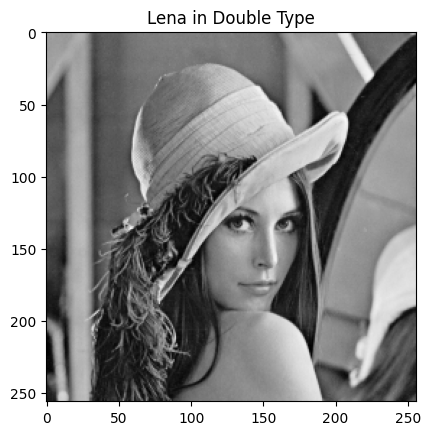

In [ ]:
lenaDouble = mpimg.imread(path+"lena.png")
show_image(lenaDouble,"Lena in Double Type")

In [ ]:
lenaDouble

array([[0.63529414, 0.6313726 , 0.62352943, ..., 0.6627451 , 0.6666667 ,
        0.5529412 ],
       [0.63529414, 0.6313726 , 0.62352943, ..., 0.6627451 , 0.6666667 ,
        0.5529412 ],
       [0.63529414, 0.62352943, 0.62352943, ..., 0.61960787, 0.5921569 ,
        0.4509804 ],
       ...,
       [0.19607843, 0.19607843, 0.21176471, ..., 0.31764707, 0.3647059 ,
        0.36078432],
       [0.16862746, 0.1882353 , 0.19607843, ..., 0.36078432, 0.39607844,
        0.38039216],
       [0.16862746, 0.20392157, 0.19607843, ..., 0.39607844, 0.4       ,
        0.41568628]], dtype=float32)

In [ ]:
lena/255.0

array([[0.63529412, 0.63137255, 0.62352941, ..., 0.6627451 , 0.66666667,
        0.55294118],
       [0.63529412, 0.63137255, 0.62352941, ..., 0.6627451 , 0.66666667,
        0.55294118],
       [0.63529412, 0.62352941, 0.62352941, ..., 0.61960784, 0.59215686,
        0.45098039],
       ...,
       [0.19607843, 0.19607843, 0.21176471, ..., 0.31764706, 0.36470588,
        0.36078431],
       [0.16862745, 0.18823529, 0.19607843, ..., 0.36078431, 0.39607843,
        0.38039216],
       [0.16862745, 0.20392157, 0.19607843, ..., 0.39607843, 0.4       ,
        0.41568627]])

**Warning:** if you have a matrix of doubles and its values are higher than 1, those will be clipped and all the image will look white. In a similar way, if you have a uint8 matrix and its values go from 0 to 1, the images will be dark af. Be consistent!!!
Finally, we have binary images, build up only with booleans that express if a condition is satisfied or not. For instance, let's threshold Lena image (in doubles), by setting to 1 those pixels with a higher grayscale value than 0.4.

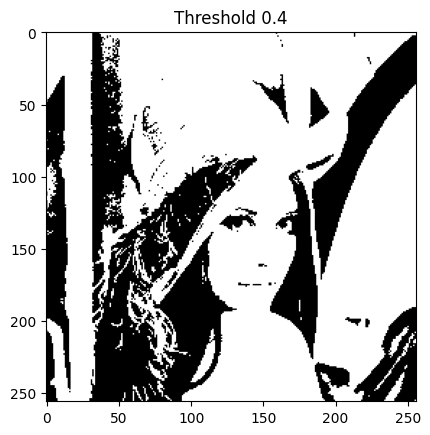

In [ ]:
lenaBinTh = lenaDouble > 0.4
show_image(lenaBinTh, "Threshold 0.4")

The displayed mask corresponds to a logical matrix that only contains 0's and 1's.
If we want to combine two thresholds (e.g. threshold grayscale values from 0.4 to 0.7), you can combine two masks by multiplying them pixelwise (True * True = True; True * False = False). These masks will be used a posteriori in exercise 2!

In [ ]:
lenaBinTh

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [ ]:
lenaBinThB = lenaDouble < 0.7;
lenaBinThB

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
lenaBin2Th = lenaBinThB * lenaBinTh
lenaBin2Th

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

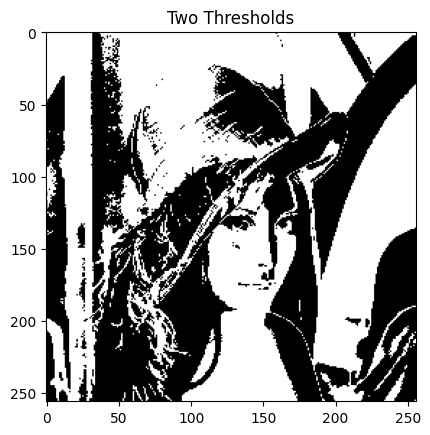

In [ ]:
show_image(lenaBin2Th, "Two Thresholds")

Given that images are, after all, basic matrices, many operations can be performed: Some of these operations have little sense (such as the product of matrices). In contrast, the sum of matrices is a mixture of the two images.
Multiplication of a matrix by some constant, or addition/subtraction of the same constant to/from all elements, produces the lighter or darker image.
For instance, let's merge Lena and Barbara!

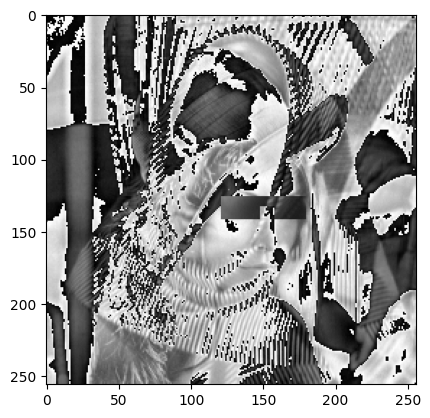

In [ ]:
barbara = np.asarray(Image.open(path+"barbara.png"))
plt.imshow(lena_old+barbara, cmap='gray', vmin=0, vmax=255)

However, as you might have seen, the output image is too bright, as it has many values that, with this simple sum, exceed 255 (pure white). In order to perform a proper mix, a weighted sum has to be performed where the weights sum to one (weightLena + weightBarbara = 1):

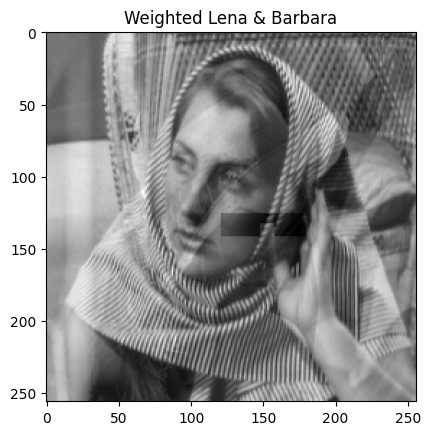

In [ ]:
weightLena = 0.2; # Try to change it!
weightBarbara = 1-weightLena;
show_image(weightLena*lena_old + weightBarbara*barbara, "Weighted Lena & Barbara")

In [ ]:
#lena_old

Other simple operations could be multiplying all pixels in the image by a constant (or adding it). As an example, if we multiply by a constant value smaller than 1, we'll see a darker image.

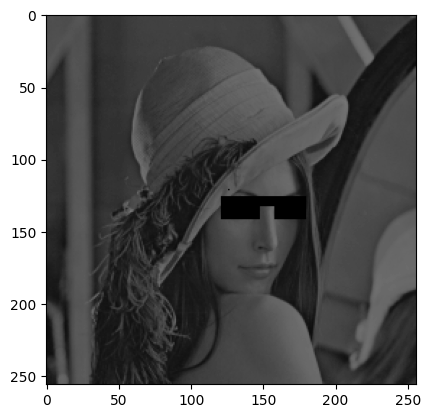

In [ ]:
#import cv2
constFac = 0.5; # change it and see what happens
mod_lena = constFac * lena
plt.imshow(mod_lena, cmap='gray', vmin=0, vmax=255)


# Color Spaces
Idk about you, but until this point images seem a little boring, mainly because we are losing its main fun... Color! In this section we'll see how is color interpreted while loading images.
First, we'll use to worldwide known RGB colorspace, which will have 3 channels: Red - Green - Blue.

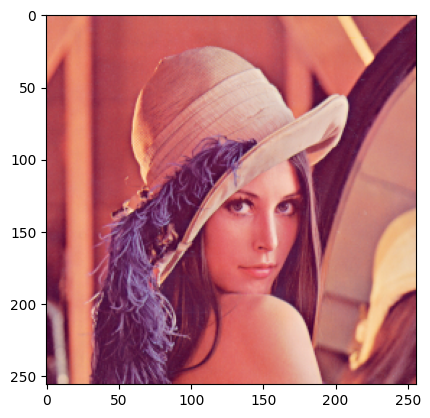

In [ ]:
lenacolor = mpimg.imread(path+"lena_color.png")
plt.imshow(lenacolor)

 As you see now, the image does not only have rows and columns, but is also has channels (third dimension). In order to access the different channels, we have to take all rows and colums (with " : ") and specify the desired channel.

In [ ]:
r_lena = lenacolor[:,:,0];
g_lena = lenacolor[:,:,1];
b_lena = lenacolor[:,:,2];

And now, we'll visualize each channel independently; but... Do you think that the red channel itself will look red?

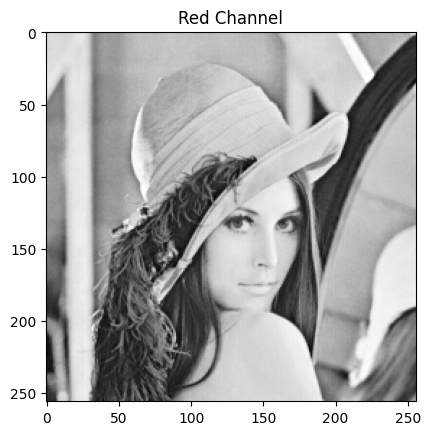

In [ ]:
show_image(r_lena, "Red Channel")

In [ ]:
r_lena.shape

(256, 256)

Uhlala... It does not! The reason is quite simple, this channel is a single channel of size 256x256, so it is not possible to display color. However, the content of the red channel indicates with brightness which pixels of the image look bright and which ones don't. For instance, you can spot that the whole Lena face is kind of red-ish, so in the channel image it has an almost constant and bright value. This means that bright values in the channel indicate the presence of red at that specific pixel in the color image (watch out, cause it may also have green and blue components!).
We can again perform several operations on top of this image, such as changing the tonality of specific channels in a region of pixels. We'll repeat the example of the sunglasses, but instead of having a "thug Lena", we'll have a "Hawkers Lena", with some fashion green-blue sunglasses.  
After working with the different channels indepently, the function numpy.dstack can be used to concatenate back into a 3-channel image.

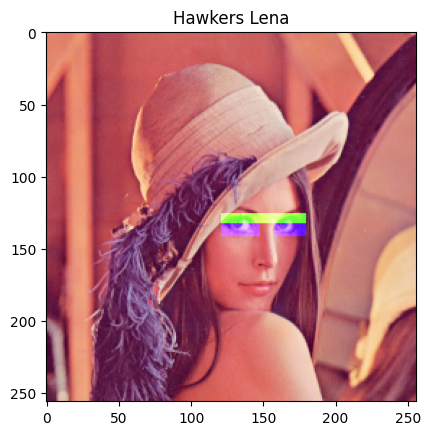

In [ ]:
channels = []
g_lena[126:133,121:180] = 1; # Modify Green Channel
b_lena[133:142, 121:148] = 1; # Modify Blue Channel (1st part)
b_lena[133:142, 158:180] = 1; # Modify Blue Channel (2nd part)
lenaHawk = np.dstack((r_lena,g_lena,b_lena))
plt.title('Hawkers Lena')
plt.imshow(lenaHawk)


However, as you might have seen in theory lectures, RGB is not the only existing colorspace. As a matter of fact, the Hue-Saturation-Value colorspace is also interesting. A matrix y in the HSV Colorspace contains:

y(:,:,1) contains Hue information, which represents color tonality. This number is often expressed as an angle between 0 and 360, but due to Skimage library, the current Hue is within the range of 0-1.

y(:,:,2) contains Saturation information, which tells how pure a color is (this is, the amount of mixed pure white light). This value is often expressed as a percentage, but once again, SkImage library casts it within 0-1 range. The higher the saturation is, the larger number of grayscale tonalities can be found (100% saturation == pure color).

y(:,:,3) contains Value information, which contains grayscale information of the specific pixel. Again, this feature is often expressed in a percentage, but when using Matlab, values must be converted again to the 0-1 range.

HSV is much more useful than RGB to perform, for instance, color filters, as the Hue channel works better to find out regions of an image with a particular tonality... Keep that in mind!

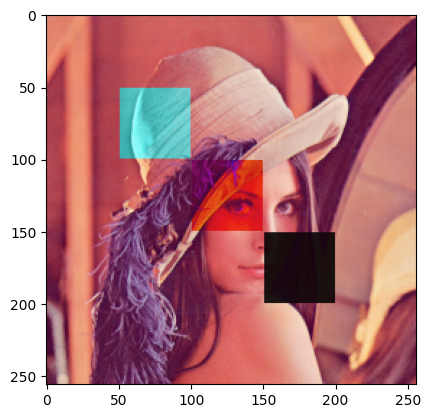

In [ ]:
#import cv2
#import colorsys
from skimage.color import rgb2hsv, hsv2rgb
lena_rgb = np.asarray(Image.open(path+"lena_color.png"))
lena_hsv = rgb2hsv(lena_rgb)
im_hue = lena_hsv[:,:,0]
im_sat = lena_hsv[:,:,1]
im_val = lena_hsv[:,:,2]
im_hue[51:100,51:100] = 0.5; # Set to a blue-ish tone
im_sat[101:150,101:150] = 0.9; # Saturate the color
im_val[151:200,151:200] = 0.1; # Set a low value (~ grayscale value)
im_hsv = np.dstack((im_hue,im_sat,im_val))
im_rgb = hsv2rgb(im_hsv)
plt.imshow(im_rgb)

You are... ready to go!

# Practice Session

# Excercise 1

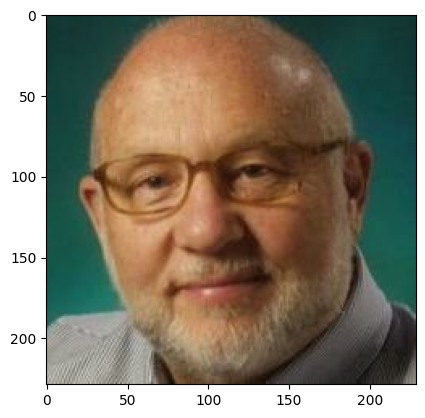

In [ ]:
cienteficoColor = mpimg.imread(path+"Cientefico.jpeg")
plt.imshow(cienteficoColor)

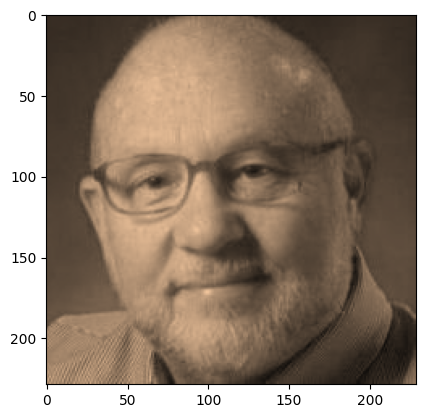

In [ ]:
import cv2
import colorsys
from skimage.color import rgb2hsv, hsv2rgb

cientefico_rgb = np.asarray(Image.open(path+"Cientefico.jpeg"))
cientefico_hsv = rgb2hsv(cientefico_rgb)

im_hue = cientefico_hsv[:,:,0]
im_sat = cientefico_hsv[:,:,1]

im_hue[:,:] = 0.08;
im_sat[:,:] = 0.35;

im_hsv = np.dstack((im_hue,im_sat,im_val))
im_rgb = hsv2rgb(im_hsv)
plt.imshow(im_rgb)

# Exercise 2 RGB

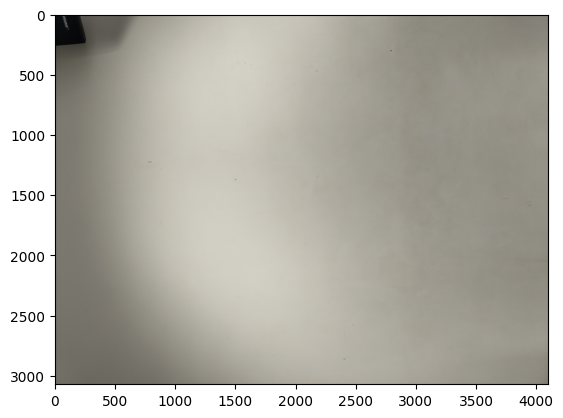

In [ ]:
fondo = mpimg.imread(path+"fondo.jpg")
plt.imshow(fondo)

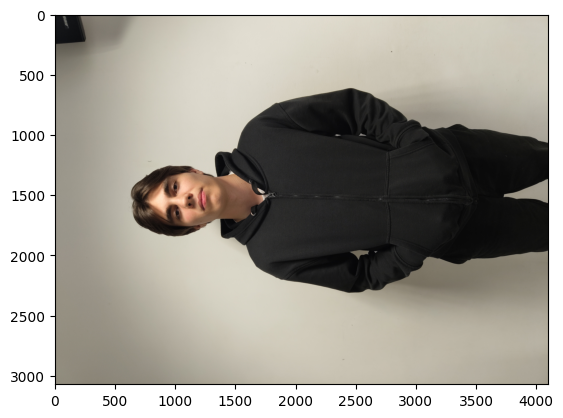

In [ ]:
retrato = mpimg.imread(path+"retrato.jpg")
plt.imshow(retrato)

In [ ]:
final = np.array(Image.open(path+"retrato.jpg"))
retrato.shape

(3072, 4096, 3)

In [ ]:
r_retrato = retrato[:,:,0];
g_retrato = retrato[:,:,1];
b_retrato = retrato[:,:,2];

r_retrato_piel1 = r_retrato < 256
r_retrato_piel2 = r_retrato > 100;
r_retrato_piel = r_retrato_piel1 * r_retrato_piel2;

g_retrato_piel1 = g_retrato < 200;
g_retrato_piel2 = g_retrato > 50;
g_retrato_piel = g_retrato_piel1 * g_retrato_piel2;

b_retrato_piel1 = b_retrato < 200;
b_retrato_piel2 = b_retrato > 20;
b_retrato_piel = b_retrato_piel1 * b_retrato_piel2;

#pixels pell true, la resta false

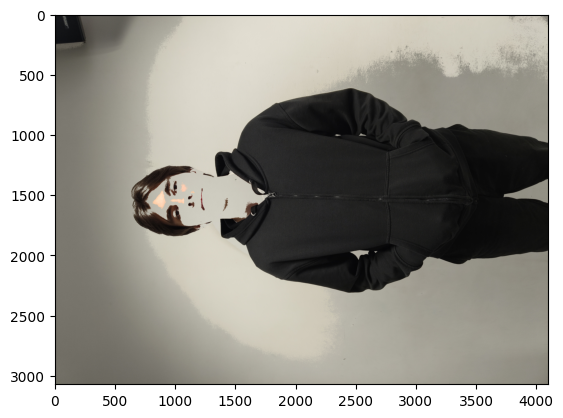

In [ ]:
for i in range(retrato.shape[0]):
  for j in range(retrato.shape[1]):
    if (r_retrato_piel[i,j] == True) and (g_retrato_piel[i,j] == True) and (b_retrato_piel[i,j] == True):
        final[i,j] = fondo[i,j];

plt.imshow(final)

# Excercise 2 HSV

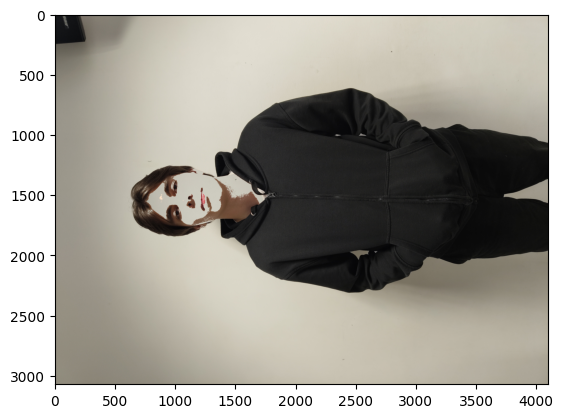

In [ ]:
import cv2
import colorsys
from skimage.color import rgb2hsv, hsv2rgb

retrato2 = np.asarray(Image.open(path+"retrato.jpg"))
fondo2 = np.asarray(Image.open(path+"fondo.jpg"))

retratoHSV = rgb2hsv(retrato2)
fondoHSV = rgb2hsv(fondo2)

im_hue = retratoHSV[:,:,0]
im_sat = retratoHSV[:,:,1]
im_val = retratoHSV[:,:,2]

im_hue_fondo = fondoHSV[:,:,0]
im_sat_fondo = fondoHSV[:,:,1]
im_val_fondo = fondoHSV[:,:,2]


for i in range(final.shape[0]):
  for j in range(final.shape[1]):
    if (0 <= im_hue[i, j] <= 0.15) and (0.23 <= im_sat[i, j] <= 0.68) and (0.5 <= im_val[i, j] <= 1):
      im_hue[i, j] = im_hue_fondo[i, j]
      im_sat[i, j] = im_sat_fondo[i, j]
      im_val[i, j] = im_val_fondo[i, j]

im_hsv = np.dstack((im_hue,im_sat,im_val))
im_rgb = hsv2rgb(im_hsv)
plt.imshow(im_rgb)

# Excercise 3

In [ ]:
from skimage.color import rgb2hsv, hsv2rgb
from skimage.util import img_as_uint

lena = np.asarray(Image.open(path+"lena.png"))
barbara = np.asarray(Image.open(path+"barbara.png"))

uint8 first equation

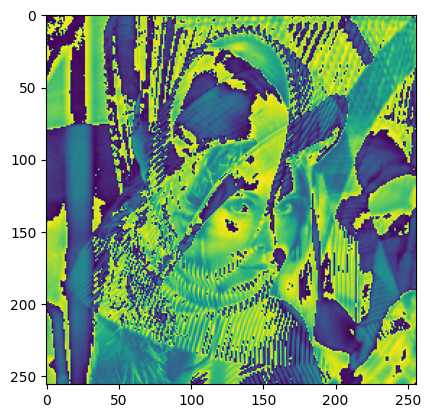

In [ ]:
lena_uint8 = img_as_uint(lena)
barbara_uint8 = img_as_uint(barbara)

result = (lena_uint8 + barbara_uint8) / 2
plt.imshow(result)


uint8 second equation

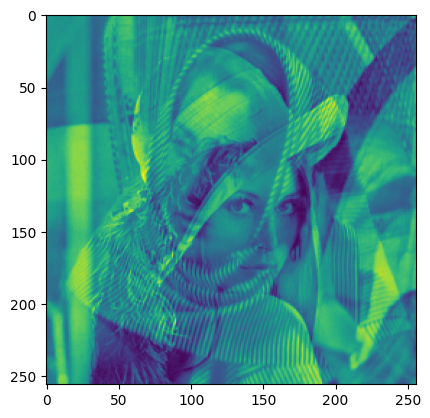

In [ ]:
lena_uint8 = img_as_uint(lena) / 2
barbara_uint8 = img_as_uint(barbara) / 2

result = lena_uint8 + barbara_uint8
plt.imshow(result)

doubles first equation

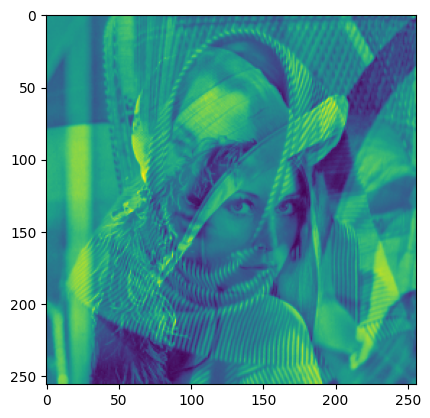

In [ ]:
lena_double = mpimg.imread(path+"lena.png")
barbara_double = mpimg.imread(path+"barbara.png")

result = (lena_double + barbara_double) / 2
plt.imshow(result)

doubles second equation

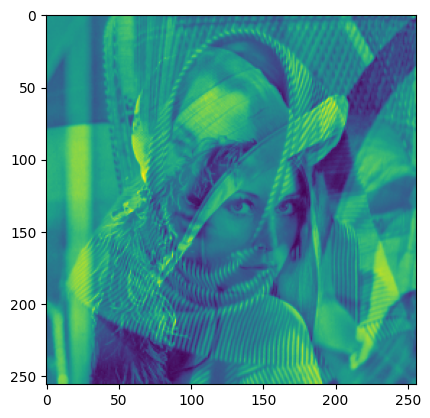

In [ ]:
lena_double = mpimg.imread(path+"lena.png") / 2
barbara_double = mpimg.imread(path+"barbara.png") / 2

result = lena_double + barbara_double
plt.imshow(result)